In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import shap
from statistics import mean, stdev
from sklearn import svm
from sklearn.preprocessing import StandardScaler


In [8]:
df = pd.read_csv("MyDataFinalCompositeScales.csv")

In [9]:
df.columns

Index(['pid', 'cid', 'hid', 'plj0433', 'age', 'sex', 'bula', 'employStat',
       'pgbilzeit', 'plb0471_v2', 'migback', 'plh0182', 'plh0176', 'plh0032',
       'plh0033', 'plh0335', 'plh0336', 'plh0038', 'plh0040', 'plj0046',
       'plj0047', 'plj0434', 'plj0435', 'bfi_consc', 'bfi_extrav', 'bfi_agree',
       'bfi_open', 'bfi_neurot', 'attitude', 'Con_Economic', 'Con_Security'],
      dtype='object')

# Data Normalization

In [10]:
scaler = StandardScaler()

In [12]:
# list of variables to be scaled
var_list = ["age", "pgbilzeit","plb0471_v2", "plh0182", "plh0176", 
                   
            "bfi_extrav", "bfi_neurot", "bfi_open", "bfi_agree", "bfi_consc",
            "plj0433", "plj0434"]

In [13]:
df[var_list] = scaler.fit_transform(df[var_list])

In [14]:
df.head()

,pid,cid,hid,plj0433,age,sex,bula,employStat,pgbilzeit,plb0471_v2,...,plj0434,plj0435,bfi_consc,bfi_extrav,bfi_agree,bfi_open,bfi_neurot,attitude,Con_Economic,Con_Security
0,5202,523,523,-0.273828,1.348956,2,2,2,-0.786697,-0.520667,...,-0.271288,5.0,0.184536,-1.118045,1.034816,0.306037,1.331064,2,1.000000,1.0
1,9402,949,949,1.954508,0.707087,1,2,1,-0.249936,0.797283,...,0.092230,6.0,0.568350,0.651538,-1.432650,-0.568938,-0.865822,2,3.000000,2.2
2,12501,1252,60330,0.468951,1.532346,1,1,2,0.823587,0.199525,...,1.182785,8.0,-0.583092,0.946469,0.329825,0.889354,-0.316601,3,1.666667,1.6
3,13901,1392,1392,0.840340,0.982174,1,2,1,-0.428856,2.888239,...,0.819267,8.0,-0.583092,-0.233253,0.329825,0.306037,0.232621,3,3.000000,2.2
4,18701,1872,1872,-0.273828,0.615392,2,1,2,0.644667,-0.424641,...,0.819267,6.0,-1.350720,-0.823114,-0.022670,-1.443913,1.880286,2,1.666667,1.0


# Regression Anaylsis

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [16]:
# first regression model: baseline features
base_model  = "plj0435 ~ age + pgbilzeit + plb0471_v2  + C(bula) + C(migback) + C(employStat) + C(sex)"
mod_base    = ols(base_model, data = df).fit()
print(mod_base.summary())  # 0.124

                            OLS Regression Results                            
Dep. Variable:                plj0435   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     70.36
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.89e-137
Time:                        19:12:06   Log-Likelihood:                -15462.
No. Observations:                6795   AIC:                         3.095e+04
Df Residuals:                    6784   BIC:                         3.102e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1956      0

In [17]:
print(mod_base.summary().as_latex())  # 0.124

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &     plj0435      & \textbf{  R-squared:         } &     0.094   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.093   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     70.36   \\
\textbf{Date:}              & Wed, 18 May 2022 & \textbf{  Prob (F-statistic):} & 1.89e-137   \\
\textbf{Time:}              &     19:12:07     & \textbf{  Log-Likelihood:    } &   -15462.   \\
\textbf{No. Observations:}  &        6795      & \textbf{  AIC:               } & 3.095e+04   \\
\textbf{Df Residuals:}      &        6784      & \textbf{  BIC:               } & 3.102e+04   \\
\textbf{Df Model:}          &          10      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0

## life satisfaction

In [18]:
# second model: inclusion of well-being variables
satis_base_model = "plj0435 ~ age + pgbilzeit + plb0471_v2  + C(bula) + C(migback) + C(employStat) + C(sex) + plh0182 + plh0176"
mod_base_satis = ols(satis_base_model, data = df).fit()
print(mod_base_satis.summary())

                            OLS Regression Results                            
Dep. Variable:                plj0435   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     67.92
Date:                Wed, 18 May 2022   Prob (F-statistic):          4.00e-157
Time:                        19:12:09   Log-Likelihood:                -15411.
No. Observations:                6795   AIC:                         3.085e+04
Df Residuals:                    6782   BIC:                         3.094e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2126      0

In [19]:
print(mod_base_satis.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &     plj0435      & \textbf{  R-squared:         } &     0.107   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.106   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     67.92   \\
\textbf{Date:}              & Wed, 18 May 2022 & \textbf{  Prob (F-statistic):} & 4.00e-157   \\
\textbf{Time:}              &     19:12:10     & \textbf{  Log-Likelihood:    } &   -15411.   \\
\textbf{No. Observations:}  &        6795      & \textbf{  AIC:               } & 3.085e+04   \\
\textbf{Df Residuals:}      &        6782      & \textbf{  BIC:               } & 3.094e+04   \\
\textbf{Df Model:}          &          12      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0

In [20]:
# model comparison: well-being + baseline versus baseline
model_comp1 = anova_lm(mod_base, mod_base_satis)
print(model_comp1)

   df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    6784.0  37683.343731      0.0         NaN        NaN           NaN
1    6782.0  37129.363748      2.0  553.979984  50.594622  1.546478e-22


In [21]:
print(model_comp1.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  df\_resid &           ssr &  df\_diff &     ss\_diff &          F &        Pr(>F) \\
\midrule
0 &    6784.0 &  37683.343731 &      0.0 &         NaN &        NaN &           NaN \\
1 &    6782.0 &  37129.363748 &      2.0 &  553.979984 &  50.594622 &  1.546478e-22 \\
\bottomrule
\end{tabular}



## Concerns

In [26]:
# third model: inclusion of concern variables
con_base_model = "plj0435 ~ age + pgbilzeit + plb0471_v2  + C(bula) + C(migback) + C(employStat) + C(sex) + plh0182 + C(plh0032) + C(plh0033) + C(plh0335) + C(plh0336) + C(plh0038) + C(plh0040) + C(plj0046) + C(plj0047)"
mod_base_con  = ols(con_base_model, data = df).fit()
print(mod_base_con.summary())

                            OLS Regression Results                            
Dep. Variable:                plj0435   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     148.7
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        19:19:11   Log-Likelihood:                -14214.
No. Observations:                6795   AIC:                         2.848e+04
Df Residuals:                    6767   BIC:                         2.868e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.7789      0

In [27]:
print(mod_base_con.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &     plj0435      & \textbf{  R-squared:         } &     0.372   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.370   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     148.7   \\
\textbf{Date:}              & Wed, 18 May 2022 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}              &     19:19:24     & \textbf{  Log-Likelihood:    } &   -14214.   \\
\textbf{No. Observations:}  &        6795      & \textbf{  AIC:               } & 2.848e+04   \\
\textbf{Df Residuals:}      &        6767      & \textbf{  BIC:               } & 2.868e+04   \\
\textbf{Df Model:}          &          27      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0

In [17]:
model_comp1 = anova_lm(mod_base_satis, mod_base_con)
print(model_comp1)

   df_resid           ssr  df_diff      ss_diff           F         Pr(>F)
0    6782.0  37129.363748      0.0          NaN         NaN            NaN
1    6781.0  34695.496441      1.0  2433.867307  475.682896  5.569770e-102


In [18]:
print(model_comp1.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  df\_resid &           ssr &  df\_diff &      ss\_diff &           F &         Pr(>F) \\
\midrule
0 &    6782.0 &  37129.363748 &      0.0 &          NaN &         NaN &            NaN \\
1 &    6781.0 &  34695.496441 &      1.0 &  2433.867307 &  475.682896 &  5.569770e-102 \\
\bottomrule
\end{tabular}



## Personality Traits

In [19]:
per_base_model = "plj0435 ~ age + pgbilzeit + plb0471_v2  + C(bula) + C(migback) + C(employStat) + C(sex) + plh0182 + Con_Economic + Con_Security + bfi_extrav + bfi_neurot + bfi_open + bfi_agree + bfi_consc"
mod_base_per  = ols(per_base_model, data = df).fit()
print(mod_base_per.summary())


                            OLS Regression Results                            
Dep. Variable:                plj0435   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     86.43
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          4.88e-287
Time:                        11:20:32   Log-Likelihood:                -15095.
No. Observations:                6795   AIC:                         3.023e+04
Df Residuals:                    6776   BIC:                         3.036e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1597      0

In [20]:
print(mod_base_per.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &     plj0435      & \textbf{  R-squared:         } &     0.187   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.185   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     86.43   \\
\textbf{Date:}              & Thu, 28 Apr 2022 & \textbf{  Prob (F-statistic):} & 4.88e-287   \\
\textbf{Time:}              &     11:20:32     & \textbf{  Log-Likelihood:    } &   -15095.   \\
\textbf{No. Observations:}  &        6795      & \textbf{  AIC:               } & 3.023e+04   \\
\textbf{Df Residuals:}      &        6776      & \textbf{  BIC:               } & 3.036e+04   \\
\textbf{Df Model:}          &          18      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0

In [21]:
model_comp2 = anova_lm(mod_base_con, mod_base_per)
print(model_comp2)

   df_resid           ssr  df_diff    ss_diff          F        Pr(>F)
0    6781.0  34695.496441      0.0        NaN        NaN           NaN
1    6776.0  33825.074191      5.0  870.42225  34.873426  2.476174e-35


In [22]:
print(model_comp2.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  df\_resid &           ssr &  df\_diff &    ss\_diff &          F &        Pr(>F) \\
\midrule
0 &    6781.0 &  34695.496441 &      0.0 &        NaN &        NaN &           NaN \\
1 &    6776.0 &  33825.074191 &      5.0 &  870.42225 &  34.873426 &  2.476174e-35 \\
\bottomrule
\end{tabular}



## Threats

In [23]:
threat_base_model = "plj0435 ~ age + pgbilzeit + plb0471_v2  + C(bula) + C(migback) + C(employStat) + C(sex) + plh0182 + Con_Economic + Con_Security + bfi_extrav + bfi_neurot + bfi_open + bfi_agree + bfi_consc + plj0433 + plj0434"
mod_base_threat  = ols(threat_base_model, data = df).fit()
print(mod_base_threat.summary())


                            OLS Regression Results                            
Dep. Variable:                plj0435   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     640.3
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:20:37   Log-Likelihood:                -12191.
No. Observations:                6795   AIC:                         2.442e+04
Df Residuals:                    6774   BIC:                         2.457e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2588      0

In [24]:
print(mod_base_threat.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}     &     plj0435      & \textbf{  R-squared:         } &     0.654   \\
\textbf{Model:}             &       OLS        & \textbf{  Adj. R-squared:    } &     0.653   \\
\textbf{Method:}            &  Least Squares   & \textbf{  F-statistic:       } &     640.3   \\
\textbf{Date:}              & Thu, 28 Apr 2022 & \textbf{  Prob (F-statistic):} &     0.00    \\
\textbf{Time:}              &     11:20:37     & \textbf{  Log-Likelihood:    } &   -12191.   \\
\textbf{No. Observations:}  &        6795      & \textbf{  AIC:               } & 2.442e+04   \\
\textbf{Df Residuals:}      &        6774      & \textbf{  BIC:               } & 2.457e+04   \\
\textbf{Df Model:}          &          20      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                            & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0

In [25]:
model_comp3 = anova_lm(mod_base_per, mod_base_threat)
print(model_comp3)

   df_resid           ssr  df_diff      ss_diff            F  Pr(>F)
0    6776.0  33825.074191      0.0          NaN          NaN     NaN
1    6774.0  14388.530461      2.0  19436.54373  4575.281249     0.0


In [26]:
print(model_comp3.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  df\_resid &           ssr &  df\_diff &      ss\_diff &            F &  Pr(>F) \\
\midrule
0 &    6776.0 &  33825.074191 &      0.0 &          NaN &          NaN &     NaN \\
1 &    6774.0 &  14388.530461 &      2.0 &  19436.54373 &  4575.281249 &     0.0 \\
\bottomrule
\end{tabular}



# Anova Test


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
X = df[[]]
y = df[["plj0435"]]

In [ ]:
feature_selector = SelectKBest(f_classif, k = 24)
X_new = feature_selector.fit(X, y)
feature_scores = pd.DataFrame()
feature_scores["feature"] = X.columns
feature_scores["score"] = [round(i, 3) for i in X_new.scores_]
feature_scores["pvalue"] = [round(i, 3) for i in X_new.pvalues_]
feature_scores = feature_scores.nlargest(24,"score")
feature_scores

In [ ]:
X = X[['age',  'bula', 'migback', 'pgbilzeit', 'plb0471_v2',                  
       'plj0434',  'plj0435', 'bfi_consc', 'bfi_extrav', 'bfi_agree',
       'bfi_open', 'bfi_neurot', 'plh0182', 'plh0176', 'plh0032', 'plh0033',
       'plh0335', 'plh0336', 'plh0040', 'plj0046', 'plj0047']]


In [ ]:
len(X.columns)

In [ ]:
df.columns

# xgboost & Shap

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import shap

In [5]:
X = df[['age', 'sex', 'bula', 'employStat', 'pgbilzeit', 'plb0471_v2', 'migback', "plh0182", "plh0176", 
        'Con_Economic', 'Con_Security', 'bfi_consc', 'bfi_extrav', 'bfi_agree',
        'bfi_open', 'bfi_neurot', "plj0433", "plj0434"]]
y = df[["plj0435"]]

# Begin Test

In [6]:
df['Multiclass'] = np.where(df['plj0435']> 7 , 2,  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
                      np.where(df['plj0435']> 3, 1,0))
y = df[['Multiclass']]

In [36]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
#clf_accu_stratified = []
#clf_f1_stratified = []
#shap_score = []
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    xgb_model.fit(X_train, y_train)
    multiclass_actual_pred = pd.DataFrame(xgb_model.predict_proba(X_test)).round(2)
    multiclass_actual_pred['Actual'] = y_test.values
    multiclass_actual_pred['Pred'] = xgb_model.predict(X_test)
    print(classification_report(multiclass_actual_pred['Actual'], multiclass_actual_pred['Pred']))    


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[11:26:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       370
           1       0.75      0.84      0.79       763
           2       0.63      0.46      0.53       226

    accuracy                           0.75      1359
   macro avg       0.73      0.68      0.70      1359
weighted avg       0.75      0.75      0.75      1359

[11:26:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       370
           1       0.74      0.82      0.78       763
           2       0.55      0.42      0.48       226

    accuracy                           0.73      1359
   macro avg       0.70      0.66      0.67      1359
weighted avg       0.72      0.73      0.72      1359

[11:26:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.78      0.73      0.75       370
           1       0.74      0.82      0.78       762
           2       0.61      0.46      0.53       227

    accuracy                           0.74      1359
   macro avg       0.71      0.67      0.69      1359
weighted avg       0.73      0.74      0.73      1359

[11:26:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.77      0.72      0.74       371
           1       0.75      0.81      0.78       762
           2       0.63      0.54      0.58       226

    accuracy                           0.74      1359
   macro avg       0.72      0.69      0.70      1359
weighted avg       0.74      0.74      0.74      1359

[11:26:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


              precision    recall  f1-score   support

           0       0.76      0.73      0.74       371
           1       0.75      0.81      0.78       762
           2       0.64      0.51      0.57       226

    accuracy                           0.74      1359
   macro avg       0.72      0.68      0.70      1359
weighted avg       0.74      0.74      0.74      1359



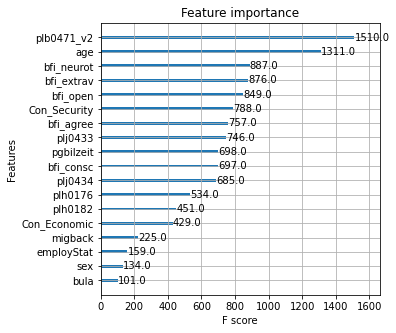

In [89]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [90]:
len(X.columns)

18

# End Test

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model.fit(X_train, Y_train)

[10:59:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [63]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


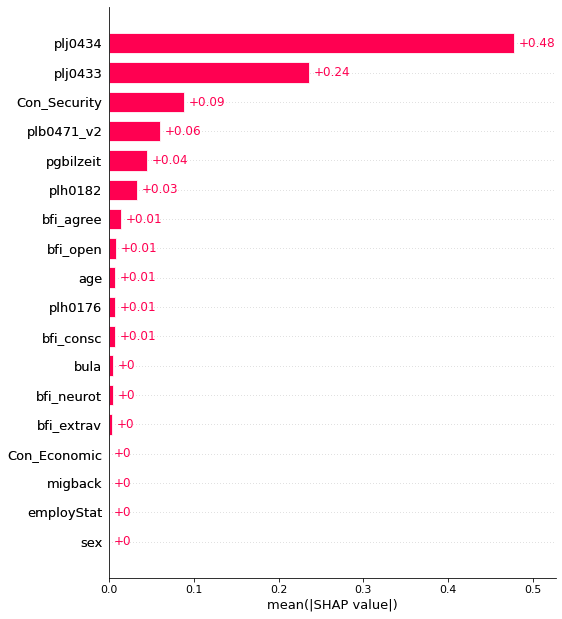

In [64]:
shap.plots.bar(shap_values, max_display=24) # default is max_display=12

In [65]:
preds = xgb_model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2.898368


In [67]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [68]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[13:27:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[13:27:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [69]:
!pip install graphviz

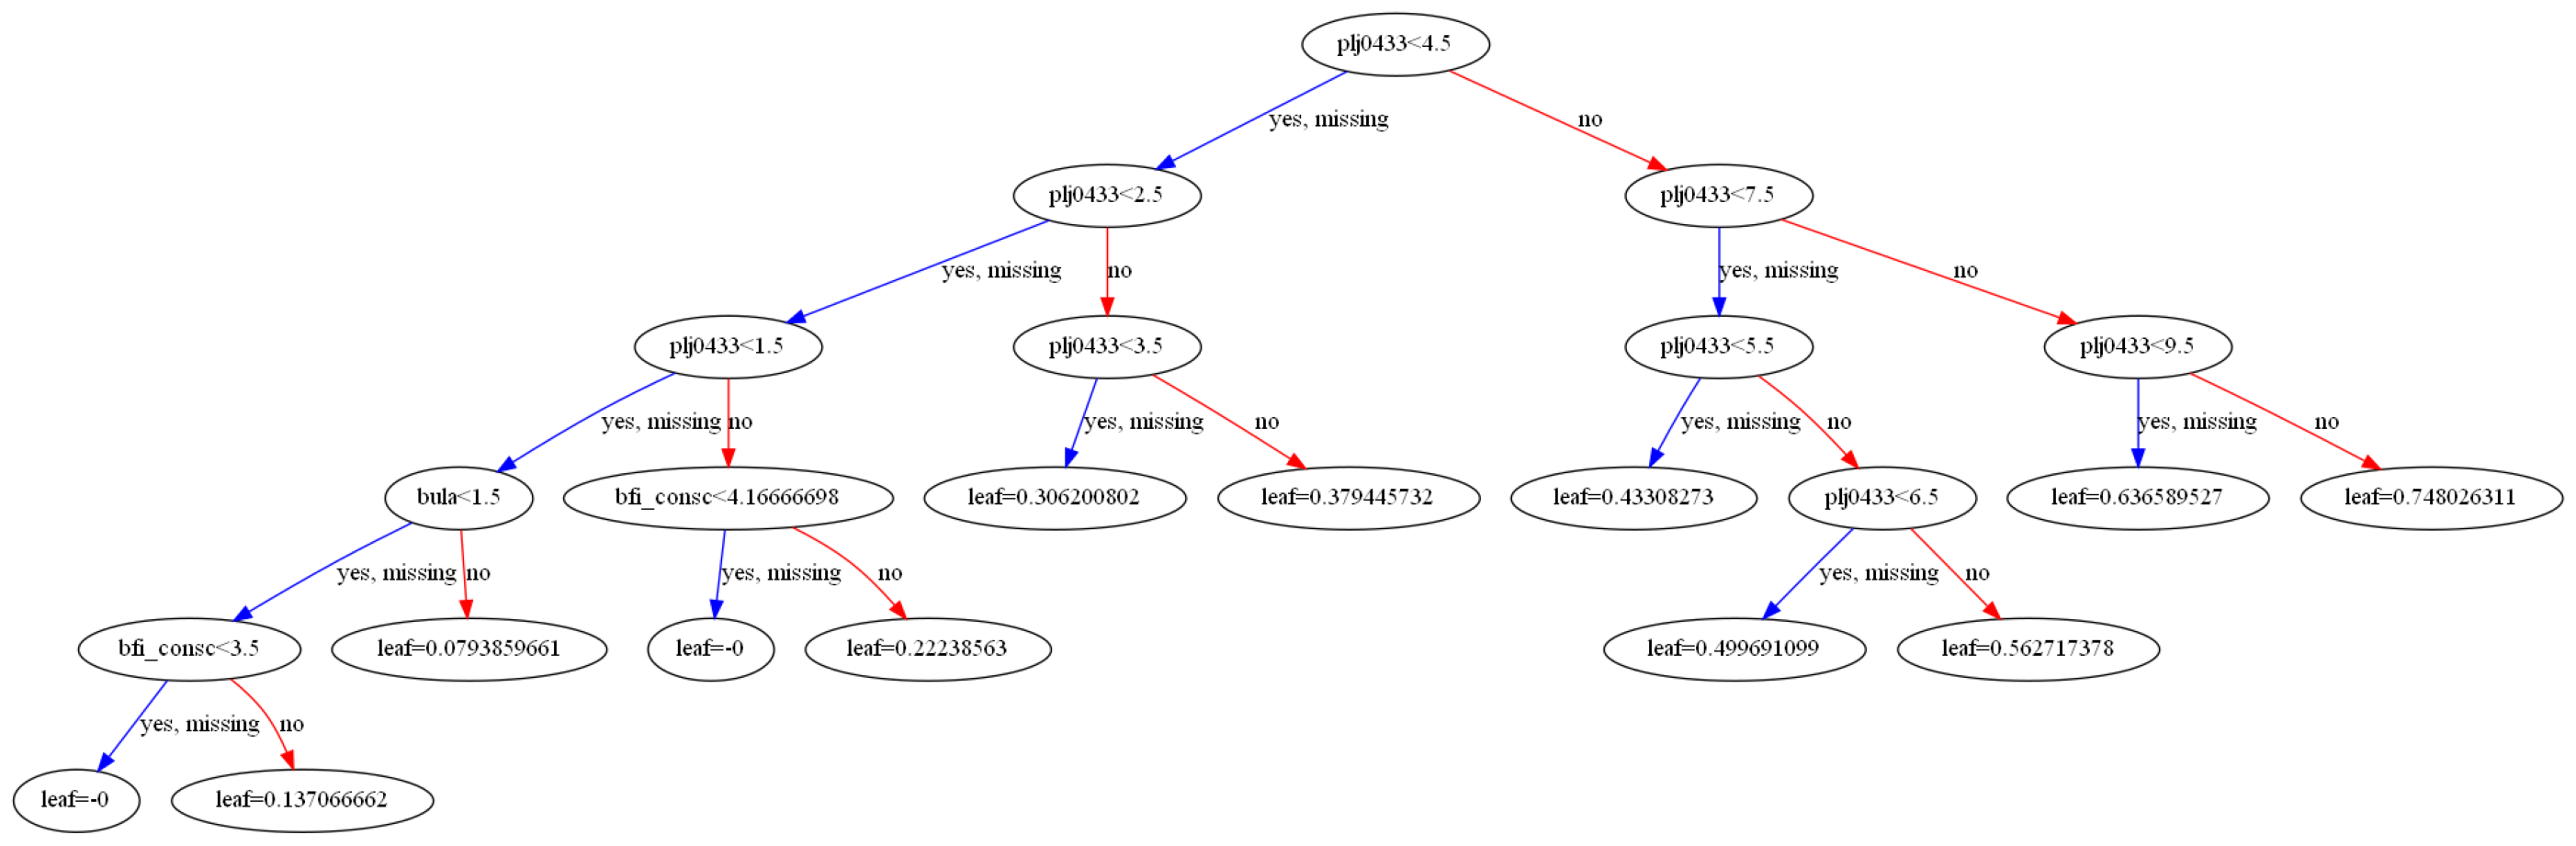

In [70]:
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'



xgb.plot_tree(xgb_model,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

In [57]:
X.head()

,age,sex,bula,employStat,pgbilzeit,plb0471_v2,migback,plh0182,plh0176,Con_Economic,Con_Security,bfi_consc,bfi_extrav,bfi_agree,bfi_open,bfi_neurot,plj0433,plj0434
0,1.348956,2,2,2,-0.786697,-0.520667,1,-1.747665,-0.905130,-2.138181,-1.449607,0.184536,-1.118045,1.034816,0.306037,1.331064,-0.273828,-0.271288
1,0.707087,1,2,1,-0.249936,0.797283,1,0.266136,1.008336,1.574654,1.163724,0.568350,0.651538,-1.432650,-0.568938,-0.865822,1.954508,0.092230
2,1.532346,1,1,2,0.823587,0.199525,1,-3.761466,-1.383497,-0.900570,-0.142942,-0.583092,0.946469,0.329825,0.889354,-0.316601,0.468951,1.182785
3,0.982174,1,2,1,-0.428856,2.888239,1,0.266136,0.529970,1.574654,1.163724,-0.583092,-0.233253,0.329825,0.306037,0.232621,0.840340,0.819267
4,0.615392,2,1,2,0.644667,-0.424641,1,0.266136,-0.426764,-0.900570,-1.449607,-1.350720,-0.823114,-0.022670,-1.443913,1.880286,-0.273828,0.819267


In [8]:
df['Multiclass'] = np.where(df['plj0435']> 7 , 'positive',  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
                      np.where(df['plj0435']> 3, 'middle','negative'))
y = df[['Multiclass']]
#X = df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, Y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[11:00:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
#shap.dependence_plot('age', shap_values, X)


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [14]:
np.shape(shap_values)

(3, 6795, 18)

In [15]:
X.shape

(6795, 18)

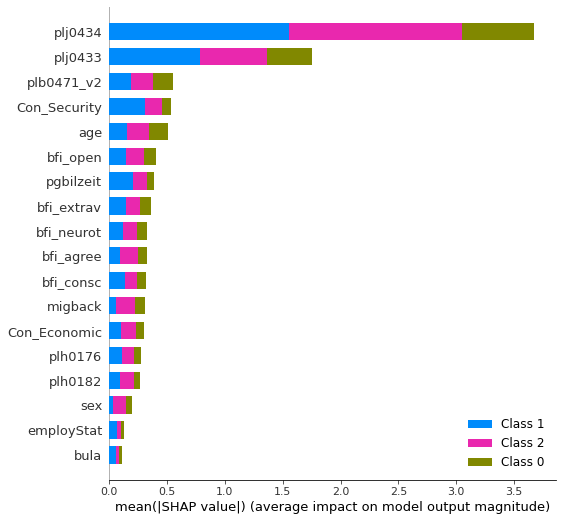

In [100]:
shap.summary_plot(shap_values, X)


In [9]:
multiclass_actual_pred = pd.DataFrame(xgb_model.predict_proba(X_test)).round(2)
multiclass_actual_pred['Actual'] = Y_test.values
multiclass_actual_pred['Pred'] = xgb_model.predict(X_test)
print(classification_report(multiclass_actual_pred['Actual'], multiclass_actual_pred['Pred']))    


              precision    recall  f1-score   support

      middle       0.76      0.81      0.78       764
    negative       0.79      0.75      0.77       375
    positive       0.59      0.48      0.53       220

    accuracy                           0.74      1359
   macro avg       0.71      0.68      0.69      1359
weighted avg       0.74      0.74      0.74      1359



In [10]:
multiclass_actual_pred['Pred'].value_counts()

middle      820
negative    358
positive    181
Name: Pred, dtype: int64

In [28]:
multiclass_actual_pred.columns = ['positive','middle','negative','Pred','Actual']
pd.crosstab(multiclass_actual_pred['Actual'],multiclass_actual_pred['Pred'])


Pred,middle,negative,positive
Actual,,,
middle,922,152,174
negative,97,414,6
positive,109,6,159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


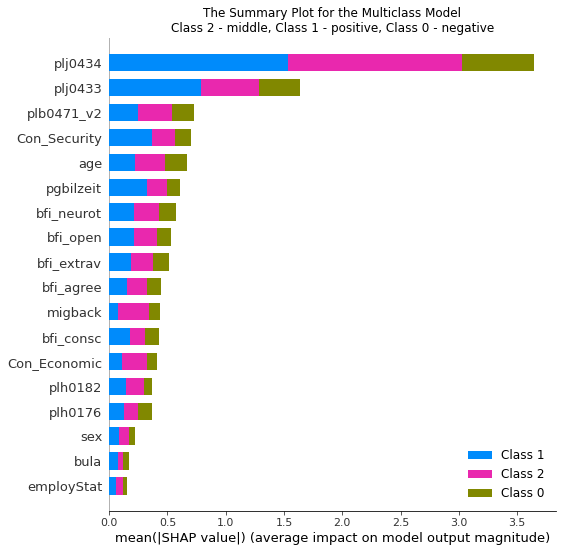

In [29]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test,approximate=True)
plt.title('The Summary Plot for the Multiclass Model'+'\n'+'Class 2 - middle, Class 1 - positive, Class 0 - negative')
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Without threats

In [72]:
X_without = df[['age', 'bula', 'migback', 'employStat', 'sex', 'pgbilzeit', 'plb0471_v2',                 
                    'bfi_consc', 'bfi_extrav', 'bfi_agree', 'bfi_open', 'bfi_neurot',                   
                   'plh0182', 'plh0176', 'plh0032', 'plh0033', 'plh0335', 'plh0336', 'plh0038', 'plh0040', 'plj0046',
                   'plj0047']]
y = df[["plj0433"]]


In [73]:
# list of variables to be scaled
var_list_out = ["bfi_extrav", "bfi_neurot", "bfi_open", "bfi_agree", "bfi_consc", 
             "pgbilzeit", "age", "plb0471_v2", 'plh0182', 'plh0176', 'plh0032', 'plh0033', 'plh0335',
            'plh0336', 'plh0038', 'plh0040', 'plj0046', 'plj0047']

In [74]:
X_without[var_list_out] = scaler.fit_transform(X_without[var_list_out])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X_without, y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


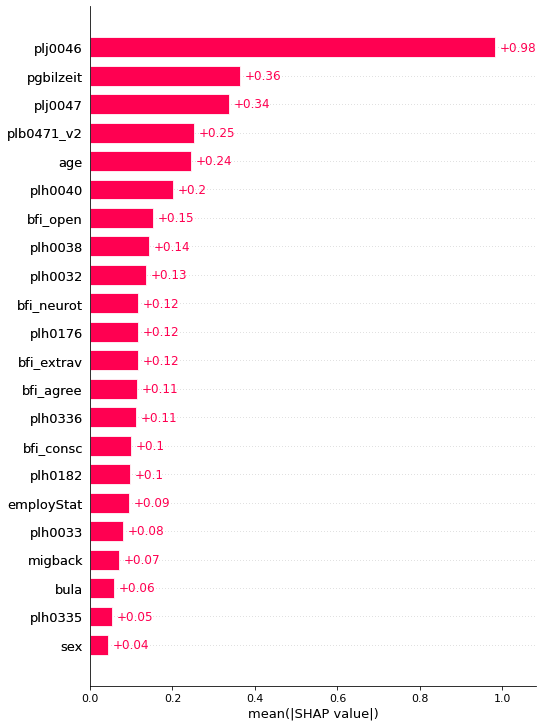

In [77]:
shap.plots.bar(shap_values, max_display=24) # default is max_display=12

In [82]:
df['Multiclass'] = np.where(df['plj0435']> 8 , 'positive',  # 2 = 'Best', 1 = 'Premium', 0 = 'Value'
                      np.where(df['plj0435']> 3, 'middle','negative'))
y = df['Multiclass']
#X = df[features]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, Y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[13:34:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [83]:
multiclass_actual_pred = pd.DataFrame(xgb_model.predict_proba(X_test)).round(2)
multiclass_actual_pred['Actual'] = Y_test.values
multiclass_actual_pred['Pred'] = xgb_model.predict(X_test)
print(classification_report(multiclass_actual_pred['Actual'], multiclass_actual_pred['Pred']))    


              precision    recall  f1-score   support

      middle       0.80      0.85      0.83       850
    negative       0.79      0.72      0.75       375
    positive       0.49      0.40      0.44       134

    accuracy                           0.77      1359
   macro avg       0.69      0.66      0.67      1359
weighted avg       0.77      0.77      0.77      1359



In [84]:
multiclass_actual_pred.columns = ['positive','middle','negative','Pred','Actual']
pd.crosstab(multiclass_actual_pred['Actual'],multiclass_actual_pred['Pred'])


Pred,middle,negative,positive
Actual,,,
middle,726,103,77
negative,69,271,4
positive,55,1,53


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


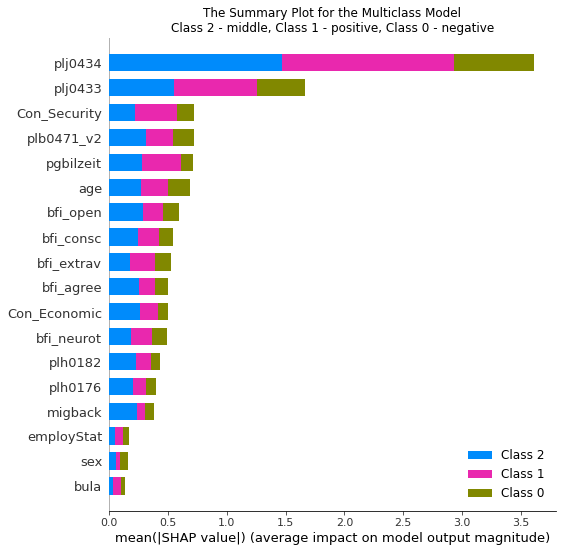

In [85]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test,approximate=True)
plt.title('The Summary Plot for the Multiclass Model'+'\n'+'Class 2 - middle, Class 1 - positive, Class 0 - negative')
shap.summary_plot(shap_values, X_test, plot_type="bar")